In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r"C:\Users\Thanasis\Downloads\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\hearing_test.csv")

In [10]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [13]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [15]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

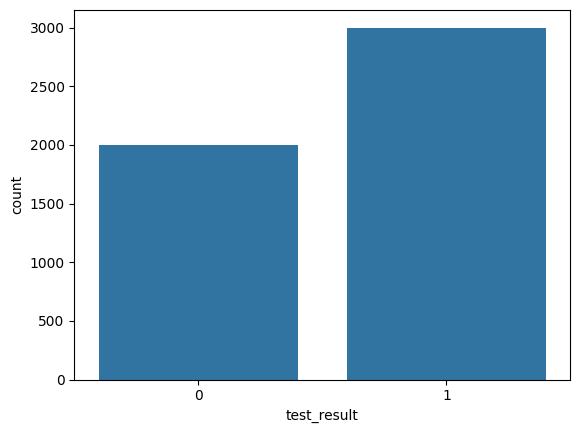

In [17]:
sns.countplot(data=df, x='test_result')

<Figure size 1600x1200 with 0 Axes>

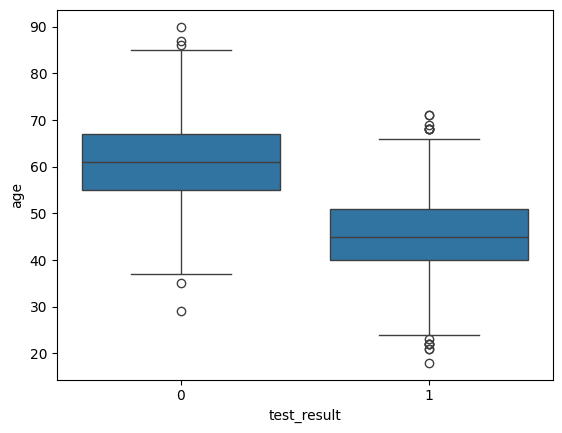

<Figure size 1600x1200 with 0 Axes>

In [19]:
sns.boxplot(x='test_result', y='age', data=df)
plt.figure(dpi=250)

<Axes: xlabel='test_result', ylabel='physical_score'>

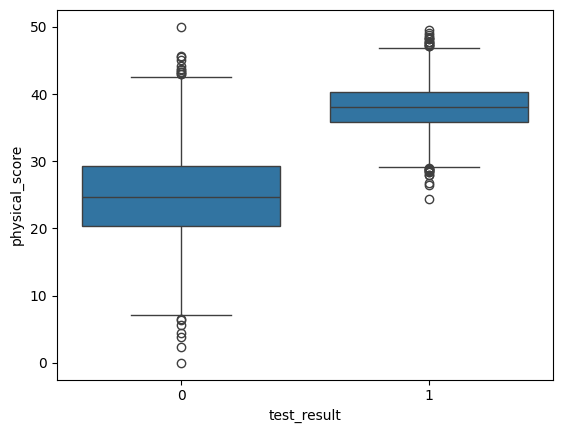

In [21]:
sns.boxplot(x='test_result', y='physical_score', data=df)

In [23]:
#oso mikroteros eisai kai oso kaluterh fusikh katastash exei, toso pio pithano einai na akouei kalutera

<Axes: xlabel='age', ylabel='physical_score'>

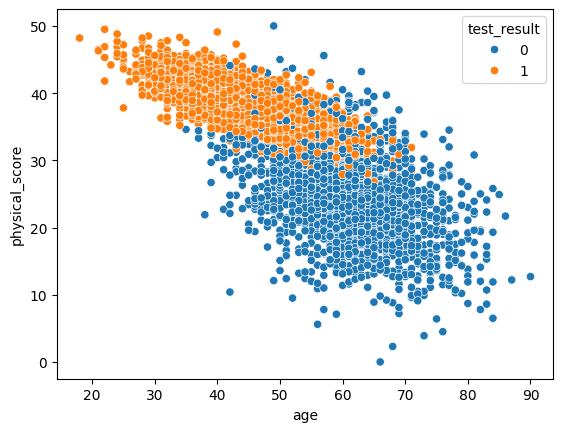

In [25]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

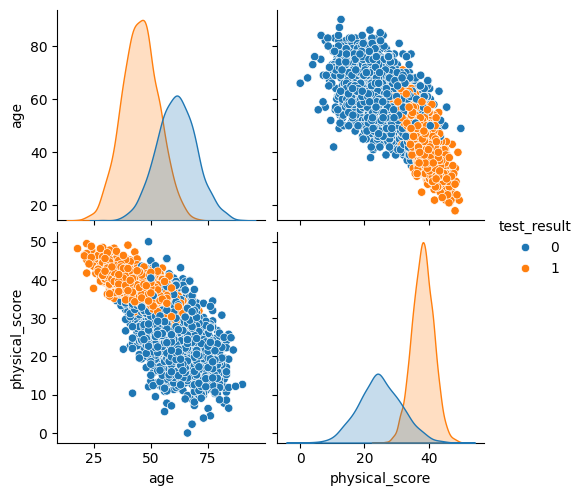

In [27]:
sns.pairplot(data=df, hue='test_result') 

<Axes: >

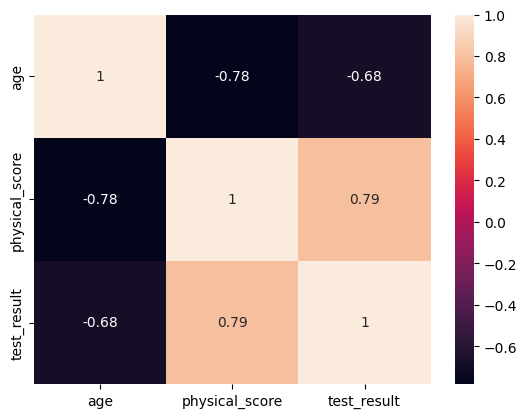

In [29]:
#Diaforoi tropoi na doume to correlation (kata poso uparxei grammikothta metaksu twn columns)
sns.heatmap(df.corr(), annot=True)

In [31]:
dff = df.corr(numeric_only = True)
dff

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


In [33]:
df.corr(numeric_only = True)['test_result'].sort_values()

age              -0.683171
physical_score    0.792716
test_result       1.000000
Name: test_result, dtype: float64

In [35]:
# Model Training

X = df.drop('test_result', axis=1)
y = df['test_result']

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [43]:
scaler = StandardScaler()

In [45]:
scaled_X_train = scaler.fit_transform(X_train)

In [47]:
scaled_X_test = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
log_model = LogisticRegression()

In [53]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [55]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [57]:
y_pred = log_model.predict(scaled_X_test)

In [59]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [61]:
abs(y_pred-y_test).value_counts()
#ara ekane lathos sta 35/500=7% twn test data o ml algorithmos mas

test_result
0    465
1     35
Name: count, dtype: int64

In [ ]:
#afto provlepei pithanotika thn kathgoria tou kathe data
y_pred_probs = log_model.predict_proba(scaled_X_test)
y_pred_probs

In [65]:
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
y_pred = log_model.predict(scaled_X_test)

In [71]:
accuracy_score(y_test, y_pred)

0.93

In [99]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [79]:
#allos tropos na doume ton confusion matrix me visualize
from sklearn.metrics import ConfusionMatrixDisplay

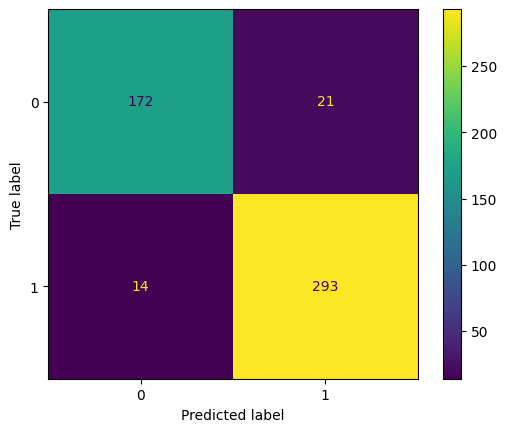

In [97]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [103]:
from sklearn.metrics import precision_score, recall_score

In [105]:
precision_score(y_test, y_pred)

0.9331210191082803

In [107]:
recall_score(y_test, y_pred)

0.9543973941368078

In [113]:
from sklearn.metrics import RocCurveDisplay

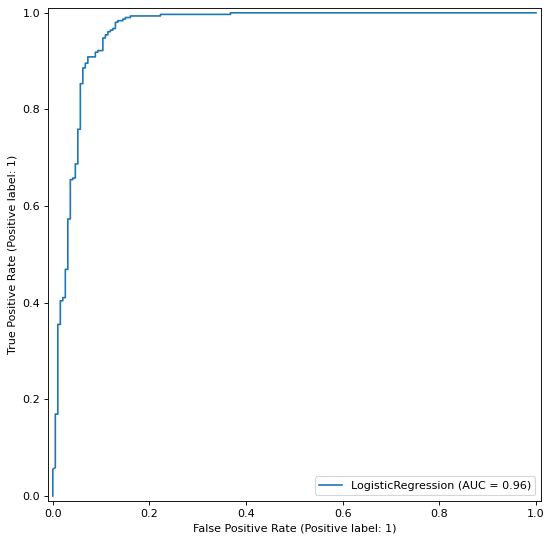

In [131]:
fig,ax = plt.subplots(figsize=(12,8), dpi=80)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)